In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
# We are selecting two features so that we can visualize the data in 2D
features = ["SepalLengthCm", "PetalLengthCm"]

In [4]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

Text(0.5, 1.0, 'Location of the obs \n and color based on data labels')

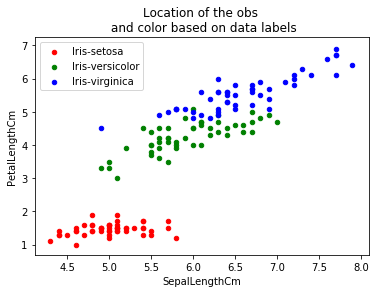

In [53]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue"]
for i, v in enumerate(df.Species.unique()):
    df[df.Species == v].plot.scatter(features[0],features[1]
                    , color = colors[i], ax = ax, label = v)
plt.legend()
plt.title("Location of the obs \n and color based on data labels")

In [57]:
# For clustering it is essential to 
# standarize the data before fitting the model
X = df[features]
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X)
X_std[:10]

array([[-0.90068117, -1.3412724 ],
       [-1.14301691, -1.3412724 ],
       [-1.38535265, -1.39813811],
       [-1.50652052, -1.2844067 ],
       [-1.02184904, -1.3412724 ],
       [-0.53717756, -1.17067529],
       [-1.50652052, -1.3412724 ],
       [-1.02184904, -1.2844067 ],
       [-1.74885626, -1.3412724 ],
       [-1.14301691, -1.2844067 ]])

In [58]:
# Fitting the model to apply clustering on the data 
# Note: we can consider only 2 columns for clustering
# Number of cluster here is 3 - let's 
# say we know there three types of flowers but 
# do not know which one is which
kmeans = cluster.KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [59]:
# Predict the cluster ... it gives a cluster index.
y = kmeans.predict(X_std)

In [60]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int32)

In [63]:
X["cluster"] = y
X.sample(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,SepalLengthCm,PetalLengthCm,cluster
13,4.3,1.1,1
59,5.2,3.9,0
132,6.4,5.6,2
70,5.9,4.8,0
53,5.5,4.0,0
114,5.8,5.1,0
18,5.7,1.7,1
42,4.4,1.3,1
55,5.7,4.5,0
120,6.9,5.7,2


In [64]:
# centroids in the original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
pd.DataFrame(centroids)

,0,1
0,5.873585,4.492453
1,5.005556,1.598148
2,6.858140,5.567442


Text(0.5, 1.0, 'Clustering of point using KMeans')

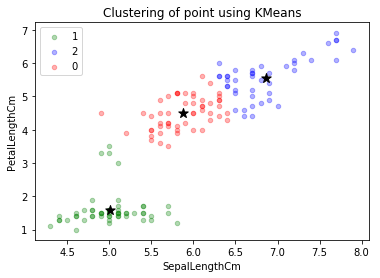

In [65]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue"]
for v in X.cluster.unique():
    X[X.cluster == v].plot.scatter(features[0],features[1]
                    , color = colors[v], ax = ax, label = v
                                   , alpha = 0.3)
plt.legend()

ax.scatter(centroids[:,0], centroids[:,1]
           , s = 100, marker = "*", color = "black")

plt.title("Clustering of point using KMeans")


In [51]:
X.cluster.value_counts()

1    54
0    53
2    43
Name: cluster, dtype: int64

In [67]:
# If we know the ground truth through any other 
# means like manual grouping or rule based process,
# we want to see how much clustering agreeing with those groupings  
metrics.homogeneity_score(df.Species, y)
# Data shows - there is an agreement on grouping for ~ 60% of the points

0.5826296711195839

No handles with labels found to put in legend.


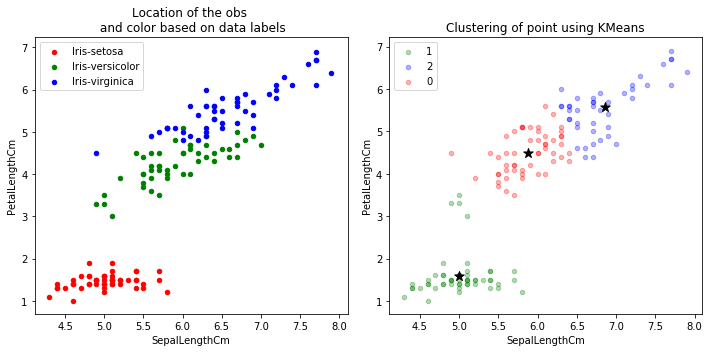

In [74]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

ax = axes[0]
colors = ["red", "green", "blue"]
for i, v in enumerate(df.Species.unique()):
    df[df.Species == v].plot.scatter(features[0],features[1]
                    , color = colors[i], ax = ax, label = v)
plt.legend()
ax.set_title("Location of the obs \n and color based on data labels")


ax = axes[1]
for v in X.cluster.unique():
    X[X.cluster == v].plot.scatter(features[0],features[1]
                    , color = colors[v], ax = ax, label = v
                                   , alpha = 0.3)
plt.legend()

ax.scatter(centroids[:,0], centroids[:,1]
           , s = 100, marker = "*", color = "black")

plt.title("Clustering of point using KMeans")
plt.tight_layout()

In [86]:
X.loc[:, "distance"] = 0.0

In [91]:
distances = np.zeros([len(y)])
for v in np.unique(y):
    cluster = X_std[y==v]
    distance = metrics.euclidean_distances(cluster
                            , kmeans.cluster_centers_[[v]])
    distances[y==v] = distance.flatten()
X.loc[:, "distance"] = distances

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [93]:
X.groupby("cluster").distance.agg(["count", "mean"])

,count,mean
cluster,,
0,53,0.435640
1,54,0.402361
2,43,0.558198


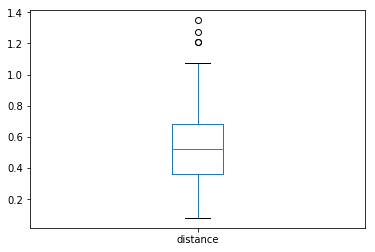

In [100]:
X[X.cluster == 2].distance.plot.box()

In [102]:
def outlier(a):
    q1, q2, q3 = np.percentile(a, [25, 50, 75])
    iqr = q3 - q1
    print(q3, q3 + 1.5 * iqr)
    upper_whisker = min(np.max(a), q3 + 1.5 * iqr)
    lower_whisker = max(np.min(a), q1 - 1.5 * iqr)
    print("Upper: ", upper_whisker, " lower: ", lower_whisker)
    return (a > upper_whisker) | (a<lower_whisker)

In [104]:
anamolies = np.repeat(False, len(y))
for v in np.unique(y):
    anamolies[y==v] = outlier(X[X.cluster == v].distance)
X["anamoly"]= anamolies
X.sample(10)

0.5662741625176801 0.9556873038269658
Upper:  0.9556873038269658  lower:  0.15323459060147918
0.6066187326676769 1.2993319996870905
Upper:  1.0815223936456582  lower:  0.006813420341945165
0.6846696455783037 1.1686278402639516
Upper:  1.1686278402639516  lower:  0.08020923722228175


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,SepalLengthCm,PetalLengthCm,cluster,distance,anamoly
78,6.0,4.5,0,0.153235,False
76,6.8,4.8,2,0.442060,False
139,6.9,5.4,2,0.107884,False
67,5.8,4.1,0,0.240323,False
17,5.1,1.4,1,0.160599,False
14,5.8,1.2,1,0.988879,False
137,6.4,5.5,2,0.556441,False
130,7.4,6.1,2,0.723039,False
46,5.1,1.6,1,0.114441,False
62,6.0,4.0,0,0.319191,False


In [105]:
X[X.anamoly]

,SepalLengthCm,PetalLengthCm,cluster,distance,anamoly
106,4.9,4.5,0,1.179680,True
117,7.7,6.7,2,1.206364,True
118,7.7,6.9,2,1.270726,True
122,7.7,6.7,2,1.206364,True
131,7.9,6.4,2,1.348258,True


No handles with labels found to put in legend.


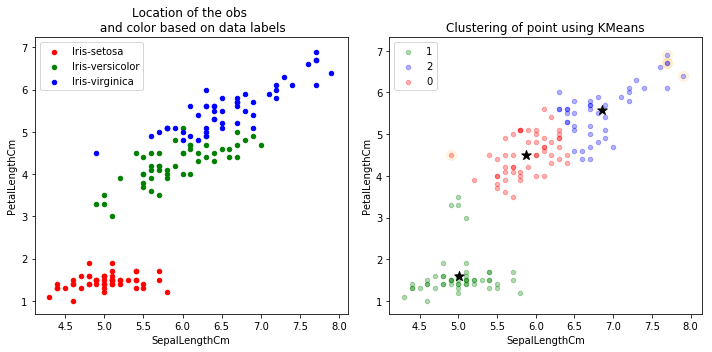

In [110]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

ax = axes[0]
colors = ["red", "green", "blue"]
for i, v in enumerate(df.Species.unique()):
    df[df.Species == v].plot.scatter(features[0],features[1]
                    , color = colors[i], ax = ax, label = v)
plt.legend()
ax.set_title("Location of the obs \n and color based on data labels")


ax = axes[1]
for v in X.cluster.unique():
    X[X.cluster == v].plot.scatter(features[0],features[1]
                    , color = colors[v], ax = ax, label = v
                                   , alpha = 0.3)
plt.legend()

ax.scatter(centroids[:,0], centroids[:,1]
           , s = 100, marker = "*", color = "black")

plt.title("Clustering of point using KMeans")
plt.tight_layout()

X[X.anamoly].plot.scatter(0,1, color = "orange"
                          , ax = ax, s = 100, alpha = 0.1)

In [114]:
scores = {}
for k in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_std)
    scores[k] = kmeans.inertia_

In [118]:
metrics.silhouette_score(X_std, y)

0.5445215684482618

Text(0, 0.5, 'Inertia score')

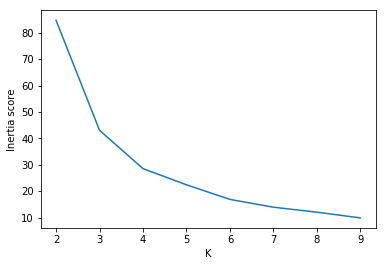

In [116]:
pd.Series(scores).plot()
plt.xlabel("K")
plt.ylabel("Inertia score")

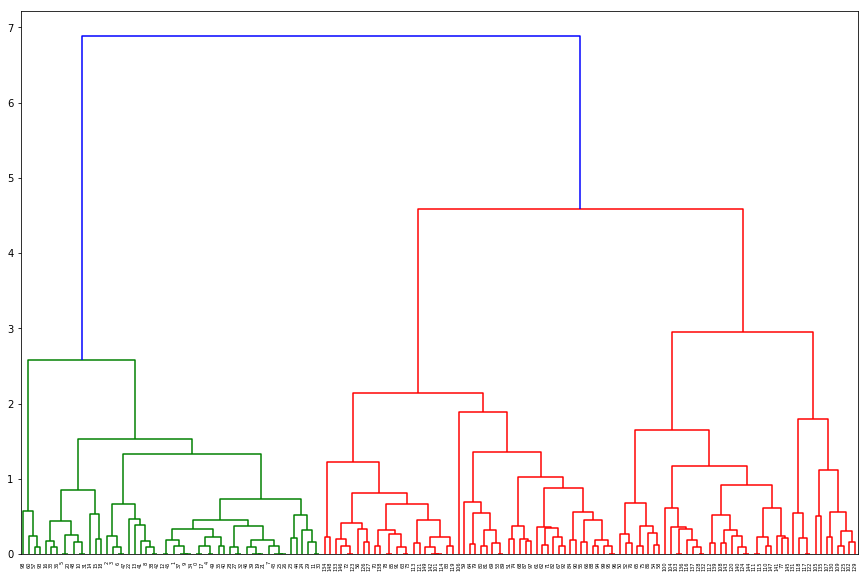

In [117]:

from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize = (15, 10))
row_clusters = linkage(X, method="complete", metric="euclidean")
f = dendrogram(row_clusters)

In [119]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [125]:
X = df.iloc[:, 1:5]
X_std = scaler.fit_transform(X)
pd.DataFrame(X_std).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [128]:
kmeans = cluster.KMeans(n_clusters=3)
X.loc[:,"cluster"] = kmeans.fit_predict(X_std)

No handles with labels found to put in legend.


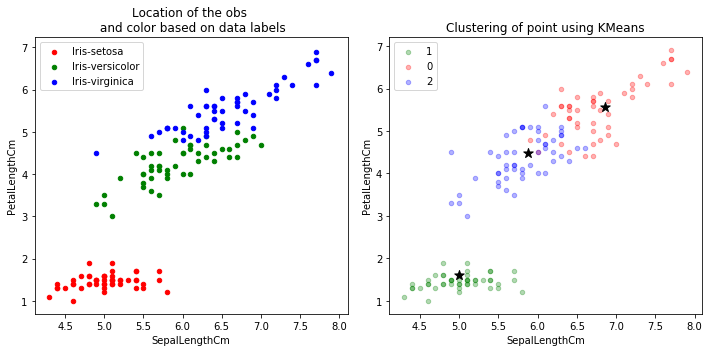

In [130]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

ax = axes[0]
colors = ["red", "green", "blue"]
for i, v in enumerate(df.Species.unique()):
    df[df.Species == v].plot.scatter(features[0],features[1]
                    , color = colors[i], ax = ax, label = v)
plt.legend()
ax.set_title("Location of the obs \n and color based on data labels")


ax = axes[1]
for v in X.cluster.unique():
    X[X.cluster == v].plot.scatter(features[0],features[1]
                    , color = colors[v], ax = ax, label = v
                                   , alpha = 0.3)
plt.legend()

ax.scatter(centroids[:,0], centroids[:,1]
           , s = 100, marker = "*", color = "black")

plt.title("Clustering of point using KMeans")
plt.tight_layout()

In [131]:
kmeans.inertia_

140.96581663074699

In [132]:
metrics.homogeneity_score(df.Species, X.cluster)

0.6591265018049008

In [133]:
metrics.silhouette_score(X_std, X.cluster)

0.4589717867018717